https://goo.gl/8hY5ER       bu linkten veri setini indirebilirsiniz yaklaşık 6gb

https://www.kaggle.com/code/prabhavsingh/urbansound8k-classification/input   alternatif link

## Mel-Frequency Cepstral Coefficients (MFCC) Algoritması
 Ses işleme ve konuşma tanıma alanında yaygın olarak kullanılan bir özellik çıkarma tekniğidir. İnsan kulağının işitme sistemine benzer şekilde ses sinyallerini analiz eder. İşte MFCC algoritmasının temel adımları:

1. Ses Sinyalinin Parçalanması:
- Ses sinyali küçük zaman dilimlerine (genellikle 20-40 milisaniye) bölünür
- Her parça üzerinde analiz yapılır

2. Pencere Fonksiyonu Uygulanması:
- Her parçaya pencere fonksiyonu (Hamming veya Hanning penceresi) uygulanır
- Bu, kenar etkilerini azaltır ve spektral sızıntıyı önler

3. Fourier Dönüşümü:
- Her parçaya Hızlı Fourier Dönüşümü (FFT) uygulanır
- Zaman domeninden frekans domenine geçiş sağlanır

4. Mel Filterbank'ı:
- Frekans spektrumu insan kulağının logaritmik algılama özelliğine uyarlanır
- Düşük frekanslarda daha sık, yüksek frekanslarda daha seyrek filterbank kullanılır

5. Logaritma ve DCT:
- Filterbank çıktısına logaritma alınır
- Ayrık Kosinüs Dönüşümü (DCT) ile sıkıştırılır

6. Katsayıların Çıkarılması:
- İlk 13 katsayı genellikle özellik olarak kullanılır
- Bu katsayılar ses sinyalinin spektral zarfını temsil eder

Avantajları:
- İnsan kulağına benzer işitme modeli
- Gürültüye dayanıklı
- Konuşma tanıma, müzik sınıflandırma gibi alanlarda yaygın kullanım

Kullanım Alanları:
- Konuşma tanıma
- Ses sınıflandırma
- Müzik türü tespiti
- Duygu analizi

## Librosa
 Python'da ses ve müzik analizi için tasarlanmış güçlü bir kütüphanedir. Özellikle dijital ses işleme (DSP) ve müzik bilgi erişimi (MIR) çalışmaları için yaygın olarak kullanılır.

Librosa'nın temel özellikleri:

1. Ses dosyası okuma ve işleme: Çeşitli formatlardaki ses dosyalarını okuyabilir ve işleyebilir.

2. Spektral analiz: Fourier dönüşümleri, melspektrogramlar, kromagram gibi spektral özellikler çıkarabilir.

3. Ritim özellikleri: Tempo tespiti, vuruş takibi gibi ritimle ilgili analizler yapabilir.

4. Perde (pitch) analizi: Temel frekans tahmini, perde izleme özellikleri sunar.

5. Segment analizi: Ses parçalarını bölümlere ayırma, benzerlikleri tespit etme.

6. Özellik çıkarma: MFCC (Mel Frequency Cepstral Coefficients) gibi özellikler çıkararak makine öğrenimi için kullanışlı veriler oluşturur.

Librosa, NumPy, SciPy gibi bilimsel Python kütüphaneleri üzerine inşa edilmiştir ve ses analizi için kolay kullanımlı, güçlü fonksiyonlar sunar. Özellikle müzik önerisi sistemleri, ses sınıflandırma, otomatik transkripsiyon ve ses mühendisliği alanlarında çok kullanışlıdır.

# 1. Bölüm -- Ses Dosyalarını ML modellerimizin anlayabileceği bir formata getireceğiz.

In [11]:
from statsmodels.sandbox.regression.gmm import results_class_dict
import matplotlib.pyplot as plt  # Veri görselleştirme ve grafik oluşturma kütüphanesi
import pandas as pd  # Veri manipülasyonu ve analizi için tablo yapısı (DataFrame) sunan kütüphane
import os  # İşletim sistemi ile etkileşim için (dosya işlemleri, dizin yönetimi vb.)
import librosa  # Ses ve müzik analizi için kullanılan kütüphane
import numpy as np  # Sayısal hesaplamalar ve çok boyutlu diziler için bilimsel hesaplama kütüphanesi
from anaconda_navigator.utils.url_utils import file_name
from tqdm import tqdm  # İlerleme çubuğu oluşturmak için kullanılan kütüphane
from sklearn.model_selection import train_test_split  # Veriyi eğitim ve test setlerine bölmek için kullanılır
from tensorflow.keras.utils import to_categorical  # Etiketleri one-hot encoding formatına dönüştürür
from sklearn.preprocessing import LabelEncoder  # Kategorik verileri sayısal değerlere dönüştürmek için kullanılır
from tensorflow.keras.models import Sequential  # Keras'ta katmanları sıralı bir şekilde eklemek için kullanılan model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  # Sinir ağı katmanları
from tensorflow.keras.optimizers import Adam  # Gradyan inişi optimizasyon algoritması
from sklearn import metrics  # Model performans değerlendirme metrikleri
from tensorflow.keras.callbacks import ModelCheckpoint  # Eğitim sırasında modelin durumunu kaydetmek için
from datetime import datetime  # Tarih ve saat işlemleri için kullanılır

In [12]:
deneme_kayit_path="deneme.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(deneme_kayit_path)

In [13]:
librosa_audio_data

array([ 0.0591024 ,  0.04647241, -0.02115159, ..., -0.0069612 ,
        0.03259261,  0.09148587], dtype=float32)

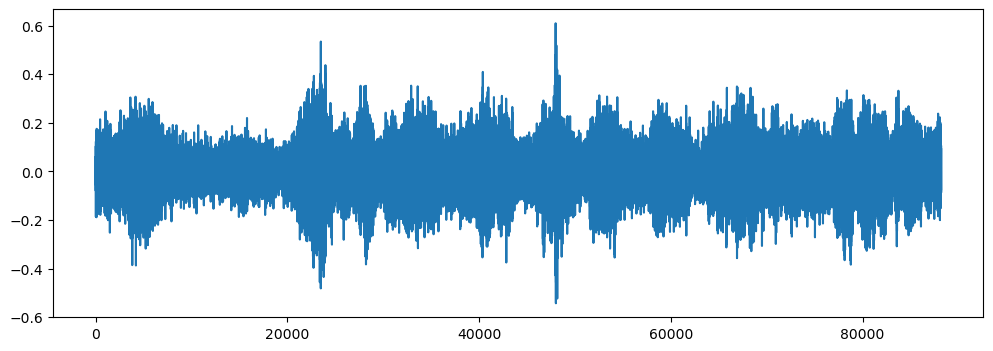

In [14]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.show()

bu sesler aslıdna stero ancak librosa monoya çevirmekte.

In [15]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
mfccs

array([[-166.06232  , -151.50266  , -172.7387   , ..., -192.53252  ,
        -179.10658  , -179.59177  ],
       [  75.67847  ,   93.39499  ,  109.314476 , ...,  107.66586  ,
          87.26424  ,   67.258606 ],
       [-107.505295 , -118.782585 , -128.7536   , ..., -112.772415 ,
         -97.96594  ,  -85.718735 ],
       ...,
       [  -9.79513  ,   -8.940213 ,  -14.132219 , ...,   -6.5950427,
          -2.1138763,   -5.715402 ],
       [   5.047469 ,    3.61415  ,    5.192342 , ...,   -4.643527 ,
         -11.839524 ,  -17.177223 ],
       [   4.929694 ,    7.5509963,    7.0431547, ...,   -2.693851 ,
          -6.5428867,   -7.3473125]], dtype=float32)

In [16]:
mfccs.shape

(40, 173)

In [17]:
metadata=pd.read_csv("UrbanSound8K.csv")
audio_dataset_path="UrbanSound8K/audio/"
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [24]:
def features_extractor(filename):

    audio, sample_rate = librosa.load(filename, res_type='soxr_hq')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [25]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [01:39, 35.81it/s]C:\Users\yigit\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [03:55, 52.78it/s]C:\Users\yigit\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\yigit\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [04:04, 35.65it/s]


In [26]:

extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581207, -122.81313, -60.745293, -13.89376, -29.789831, -3.9788754, 11.682742, 12.963828, 8.336421, -6.529819, -2.996106, -12.88795, 5.885933, -2.4752254, -4.4083114, -15.014478, -0.94399697, -2.5799103, 6.0982966, -10.786229, -8.063478, 5.84409, -3.1225371, -5.9842277, -0.07994461, -3.68709, 4.7476764, -6.530094, -5.0838842, 0.48772517, 7.510885, -0.8853597, 2.3938138, -6.392372, -2.1318593, 2.2760148, -0.79108334, -1.5400676, 1.3211495]",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, 9.853778, 7.9696927, 11.197088, 1.9291173, 7.0303974, 4.270228, -3.5847256, 13.890946, -2.7644935, 7.2725554, 5.534419, 1.8692906, 1.7257472, 7.038668, -2.4422672, 3.4736145, 0.07422889, 6.218863, -0.18934049, 6.654603, -0.26363167, 0.20248906, -3.6517172, 0.77690846, -5.9063616, 0.87029886, -1.2502266, 2.2772195, -1.5392423, 0.76710874, -0.8787235, 0.9087377, -2.681854, 1.7067982, -1.7936064, 1.7613845]",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.19586, 8.631845, 15.379366, 16.882149, 1.2330474, 6.8331223, 3.9001155, -5.1688495, 8.300045, 1.9041388, 6.658551, 3.8206112, 2.9016156, -3.5975335, 0.8222546, -0.11868463, 9.371599, 2.4477532, 5.305525, -0.46876878, 1.723286, -2.8183048, 2.0077457, -2.1846373, 0.19048111, -2.8493907, 2.363491, 0.06725757, -0.1545396, -5.2859545, -0.7900161, -2.9792113, -0.20284472, -3.0880818, 3.8080137, -0.09005574, 0.8691022]",children_playing
3,"[-406.47922, 91.1966, -25.043558, 42.78452, 11.586844, 5.0541644, 12.431632, -1.5999486, 6.6560636, 1.4423548, -4.6248703, 14.211005, 0.4342713, 6.992811, 0.46317533, -0.49895173, 3.3375695, 4.2080894, 2.2851107, 3.3822718, -3.9330814, 4.259821, -4.5725174, 2.6061785, -2.1226885, 0.10393074, -3.6083133, 0.18719862, -4.2828794, -1.2783613, -4.996307, 1.2791549, 0.6357336, 1.4141308, -2.8311207, 1.8081789, -2.1784313, -0.4364796, -3.051344, -0.17001334]",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277, 12.209423, 15.873465, 11.729268, 1.5335851, 11.292244, 2.5486214, -7.2909727, 10.374461, 2.101837, 4.6987934, 6.5470266, 5.372394, -2.1907532, 1.9804034, -4.6603904, 9.253263, 2.1109693, 4.173506, -0.43920165, 3.2909656, -2.397835, 1.7053794, -1.5515199, 4.642389, -1.0033618, 0.11767066, -2.9283946, -0.77408916, -0.98524654, 2.5663688, -2.9768786, 1.0717415, -1.8256017, 3.2913966, -0.16967042, 1.3925837]",children_playing


In [27]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [28]:
X.shape

(8732, 40)

In [29]:
X

array([[-2.11936981e+02,  6.25812073e+01, -1.22813133e+02, ...,
        -7.91083336e-01, -1.54006755e+00,  1.32114947e+00],
       [-4.17005188e+02,  9.93366241e+01, -4.29955864e+01, ...,
         1.70679820e+00, -1.79360640e+00,  1.76138449e+00],
       [-4.52393158e+02,  1.12362534e+02, -3.75780678e+01, ...,
         3.80801368e+00, -9.00557414e-02,  8.69102180e-01],
       ...,
       [-2.97315338e+02,  1.02090263e+02, -3.67510796e+01, ...,
        -1.62244546e+00,  1.25214386e+00,  9.13216782e+00],
       [-3.36923859e+02,  1.15313896e+02, -4.48470993e+01, ...,
        -6.76911306e+00, -2.85838675e+00,  6.95349216e+00],
       [-3.07417603e+02,  8.33067322e+01, -2.57565117e+01, ...,
         8.39591503e-01, -1.17747602e+01, -5.59599781e+00]], dtype=float32)

In [31]:
y.shape

(8732,)

In [32]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [33]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [36]:
y
# label encoder o özelliğe sahipse 1 diğerlerine 0 verir.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6985, 40), (6985, 10), (1747, 40), (1747, 10))

# 2. Bölüm Modeli Eğiteceğiz

In [40]:
feature_labels=10

CNN

In [41]:
model=Sequential()
# hidden layer
model.add(Dense(125,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# hidden layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# hidden layer
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(feature_labels))
model.add(Activation('softmax'))

C:\Users\yigit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 125)            │         5,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 125)            │        25,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,710 (221.52 KB)

 Trainable params: 56,710 (221.52 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
epochscount=350
num_batch_size=32

model.fit(X_train,y_train,batch_size=num_batch_size,epochs=epochscount,validation_data=(X_test,y_test),verbose=1)

Epoch 1/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1183 - loss: 20.7970 - val_accuracy: 0.1334 - val_loss: 2.2858
Epoch 2/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1254 - loss: 2.8927 - val_accuracy: 0.1191 - val_loss: 2.2834
Epoch 3/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1373 - loss: 2.3781 - val_accuracy: 0.1397 - val_loss: 2.2633
Epoch 4/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1327 - loss: 2.2909 - val_accuracy: 0.1471 - val_loss: 2.2383
Epoch 5/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1478 - loss: 2.2357 - val_accuracy: 0.2255 - val_loss: 2.1574
Epoch 6/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1738 - loss: 2.1957 - val_accuracy: 0.2776 - val_loss: 2.0603
Epoch 7/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2013 - loss: 2.1231 - val_accuracy: 0.2896 - val_loss: 1.9900
Epoch 8/350
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2577 - loss: 2.0432 - val_acc

In [46]:
validation_score=model.evaluate(X_test,y_test)
print(validation_score[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.6117
0.8420149087905884


In [83]:
test_1_sound_path="dog.wav"
test_2_sound_path="PoliceSiren.wav"
test_3_sound_path="car-horn.wav"

In [84]:
sound_signal ,sample_rate=librosa.load(test_3_sound_path, res_type='soxr_hq')
mfccs_features=librosa.feature.mfcc(y=sound_signal,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

In [85]:
print(mfccs_scaled_features)

[-3.51861328e+02  9.95142136e+01 -2.86420956e+01  5.64186954e+00
 -1.07449446e+01 -1.83431721e+00 -1.30847435e+01  2.40715075e+00
 -9.96369076e+00 -5.66500854e+00 -1.35841961e+01 -1.04124479e+01
 -1.70992012e+01 -8.78591633e+00 -1.25796289e+01 -6.13801956e+00
 -7.87028074e+00 -3.73211312e+00 -7.38302994e+00 -1.08386397e+00
 -9.16593456e+00 -1.00623522e+01 -1.07108784e+01 -4.58389854e+00
 -3.39620686e+00 -3.02657056e+00 -9.40106487e+00 -1.42729247e+00
 -4.76926833e-01  7.41878152e-01 -1.07575750e+01 -5.91164827e+00
  1.45329678e+00  4.34891653e+00 -2.91613030e+00  2.06302240e-01
  1.94198859e+00 -3.36215943e-02 -1.13899460e+01 -3.28655815e+00]


In [86]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

In [87]:
mfccs_scaled_features.shape

(1, 40)

In [88]:
result_array=model.predict(mfccs_scaled_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [89]:
result_array

array([[0.00386648, 0.07225415, 0.0294077 , 0.14217721, 0.04697988,
        0.00928529, 0.00877345, 0.00440258, 0.01722653, 0.6656267 ]],
      dtype=float32)

In [90]:
result_classes = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

result = np.argmax(result_array[0])
print(result_classes[result])

street_music
